Outlier Indices: [10, 12, 14, 25, 26, 28, 29, 30, 31, 35, 36, 37, 38, 39, 45, 46, 51, 52, 53]


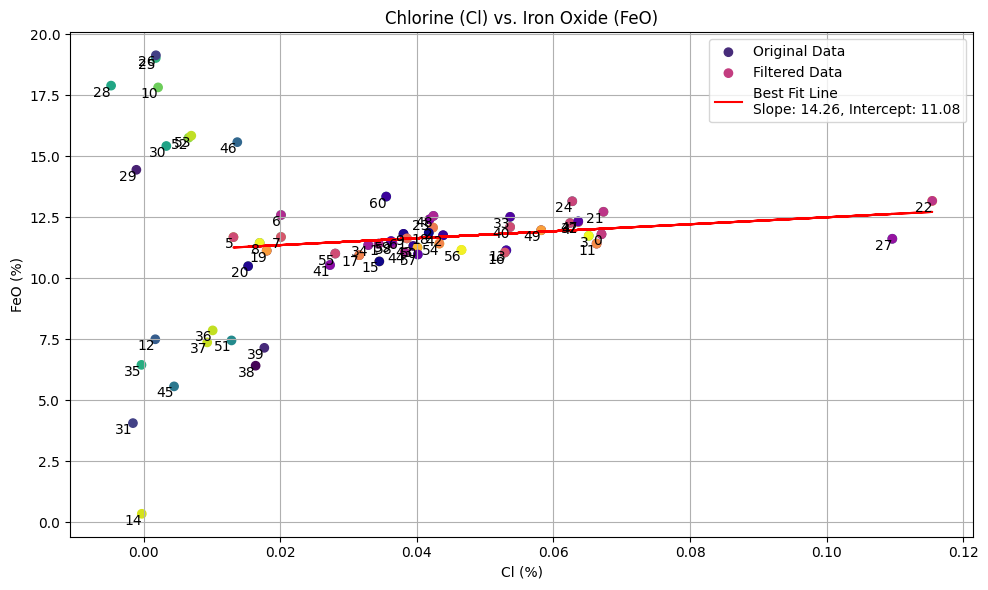

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

file_path = '/Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.1 Analyses/EPMA RAW DATA/Cl FeO.csv'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()

Cl = data['Cl']
FeO = data['FeO']

slope, intercept, r_value, p_value, std_err = stats.linregress(Cl, FeO)
line = slope * Cl + intercept

residuals = np.abs(FeO - line)

threshold = 2 

outlier_mask = residuals > threshold
outliers = data[outlier_mask]
outlier_indices = outliers.index.tolist()

filtered_Cl = Cl[~outlier_mask]
filtered_FeO = FeO[~outlier_mask]

print("Outlier Indices:", outlier_indices)

plt.figure(figsize=(10, 6))
colors = np.random.rand(len(Cl))
plt.scatter(Cl, FeO, c=colors, cmap='viridis', label='Original Data')

filtered_colors = np.random.rand(len(filtered_Cl))
plt.scatter(filtered_Cl, filtered_FeO, c=filtered_colors, cmap='plasma', label='Filtered Data')

filtered_slope, filtered_intercept, _, _, _ = stats.linregress(filtered_Cl, filtered_FeO)
plt.plot(filtered_Cl, filtered_slope * filtered_Cl + filtered_intercept, color='red', label=f'Best Fit Line\nSlope: {filtered_slope:.2f}, Intercept: {filtered_intercept:.2f}')

plt.title('Chlorine (Cl) vs. Iron Oxide (FeO)')
plt.xlabel('Cl (%)')
plt.ylabel('FeO (%)')
plt.legend()
plt.grid(True)

for j, txt in enumerate(range(len(Cl)), start=1):
    plt.annotate(txt, (Cl.iloc[j - 1], FeO.iloc[j - 1]), fontsize=10, ha='right', va='top', color='black')

plt.tight_layout()
plt.show()


Outlier Indices: [10, 12, 14, 25, 26, 28, 29, 30, 31, 35, 36, 37, 38, 39, 45, 46, 51, 52, 53]
New Index without Outliers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 32, 33, 34, 40, 41, 42, 43, 44, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 60, 61]


/var/folders/m8/zmzplh5j4j98pl23b1405xr00000gn/T/ipykernel_9930/1288765005.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Cl, FeO, c=colors, cmap='viridis', label='Data Points')


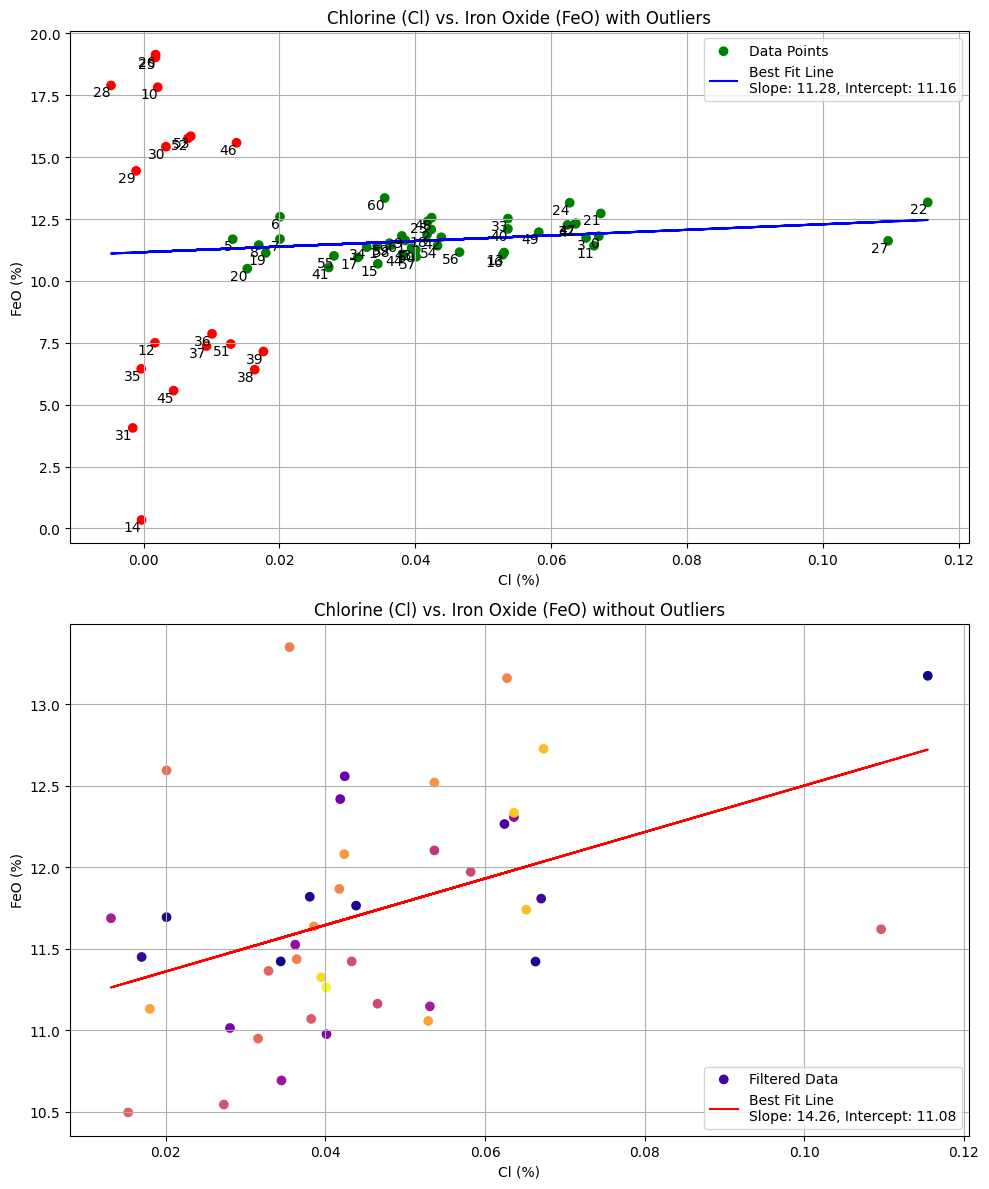

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

file_path = '/Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.1 Analyses/EPMA RAW DATA/Cl FeO.csv'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()

Cl = data['Cl']
FeO = data['FeO']

slope, intercept, r_value, p_value, std_err = stats.linregress(Cl, FeO)
line = slope * Cl + intercept

residuals = np.abs(FeO - line)

threshold = 2  

outlier_mask = residuals > threshold
outliers = data[outlier_mask]
outlier_indices = outliers.index.tolist()

filtered_Cl = Cl[~outlier_mask]
filtered_FeO = FeO[~outlier_mask]

print("Outlier Indices:", outlier_indices)
new_index = data[~outlier_mask].index.tolist()
print("New Index without Outliers:", new_index)

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
colors = ['red' if outlier else 'green' for outlier in outlier_mask]
plt.scatter(Cl, FeO, c=colors, cmap='viridis', label='Data Points')
plt.plot(Cl, slope * Cl + intercept, color='blue', label=f'Best Fit Line\nSlope: {slope:.2f}, Intercept: {intercept:.2f}')
plt.title('Chlorine (Cl) vs. Iron Oxide (FeO) with Outliers')
plt.xlabel('Cl (%)')
plt.ylabel('FeO (%)')
plt.legend()
plt.grid(True)

for j, txt in enumerate(range(len(Cl)), start=1):
    plt.annotate(txt, (Cl.iloc[j - 1], FeO.iloc[j - 1]), fontsize=10, ha='right', va='top', color='black')

plt.subplot(2, 1, 2)
filtered_colors = np.random.rand(len(filtered_Cl))
plt.scatter(filtered_Cl, filtered_FeO, c=filtered_colors, cmap='plasma', label='Filtered Data')
plt.plot(filtered_Cl, filtered_slope * filtered_Cl + filtered_intercept, color='red', label=f'Best Fit Line\nSlope: {filtered_slope:.2f}, Intercept: {filtered_intercept:.2f}')
plt.title('Chlorine (Cl) vs. Iron Oxide (FeO) without Outliers')
plt.xlabel('Cl (%)')
plt.ylabel('FeO (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
